In [34]:
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-muted')
# plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

%config InlineBackend.figure_formats = {'png', 'retina'}

import pandas as pd
import numpy as np


# <font color='darkorange'>In-Class Activity: Default Model using Discriminant Analysis</font>

In [35]:
def_df =  pd.read_excel('data/supervised-learning.xlsx', 
                       sheet_name='Default', usecols=['No.',	"default",	"student"	,"balance"	,"income"], header=0)


In [36]:
def_df.head()

,No.,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [37]:
def_df['student']= def_df['student'].map({'No':0, 'Yes':1})

In [38]:
def_df.head()

,No.,default,student,balance,income
0,1,No,0,729.526495,44361.625074
1,2,No,1,817.180407,12106.134700
2,3,No,0,1073.549164,31767.138947
3,4,No,0,529.250605,35704.493935
4,5,No,0,785.655883,38463.495879


**Fit LDA model and evaluate the performance**

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

y = def_df['default']
X_def = def_df.drop(['default','No.'], axis=1)

lda_clf = LDA()
lda_clf.fit(X_def, y)

LinearDiscriminantAnalysis()

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = lda_clf.predict(X_def)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[9645   22]
 [ 254   79]]
              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



**Fit QDA model and evaluate train/test performance**

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

y = def_df['default']
X_def = def_df.drop(['default','No.'], axis=1)

qda_clf = QDA()
qda_clf.fit(X_def, y)

QuadraticDiscriminantAnalysis()

In [42]:
y_pred = qda_clf.predict(X_def)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[9636   31]
 [ 239   94]]
              precision    recall  f1-score   support

          No       0.98      1.00      0.99      9667
         Yes       0.75      0.28      0.41       333

    accuracy                           0.97     10000
   macro avg       0.86      0.64      0.70     10000
weighted avg       0.97      0.97      0.97     10000



Adjusting Threshold

In [50]:
from sklearn.metrics import  precision_score, recall_score
history = []
y = def_df['default'].map({'No':0, 'Yes':1})
for DECISION_TH in np.arange(0.9, 0, -0.1):
    y_pred = (qda_clf.predict_proba(X_def)[:,1] > DECISION_TH).astype(int)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    history.append([DECISION_TH.round(2), precision, recall])

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Decision Threshold')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Precision and Recall vs. Decision Threshold')

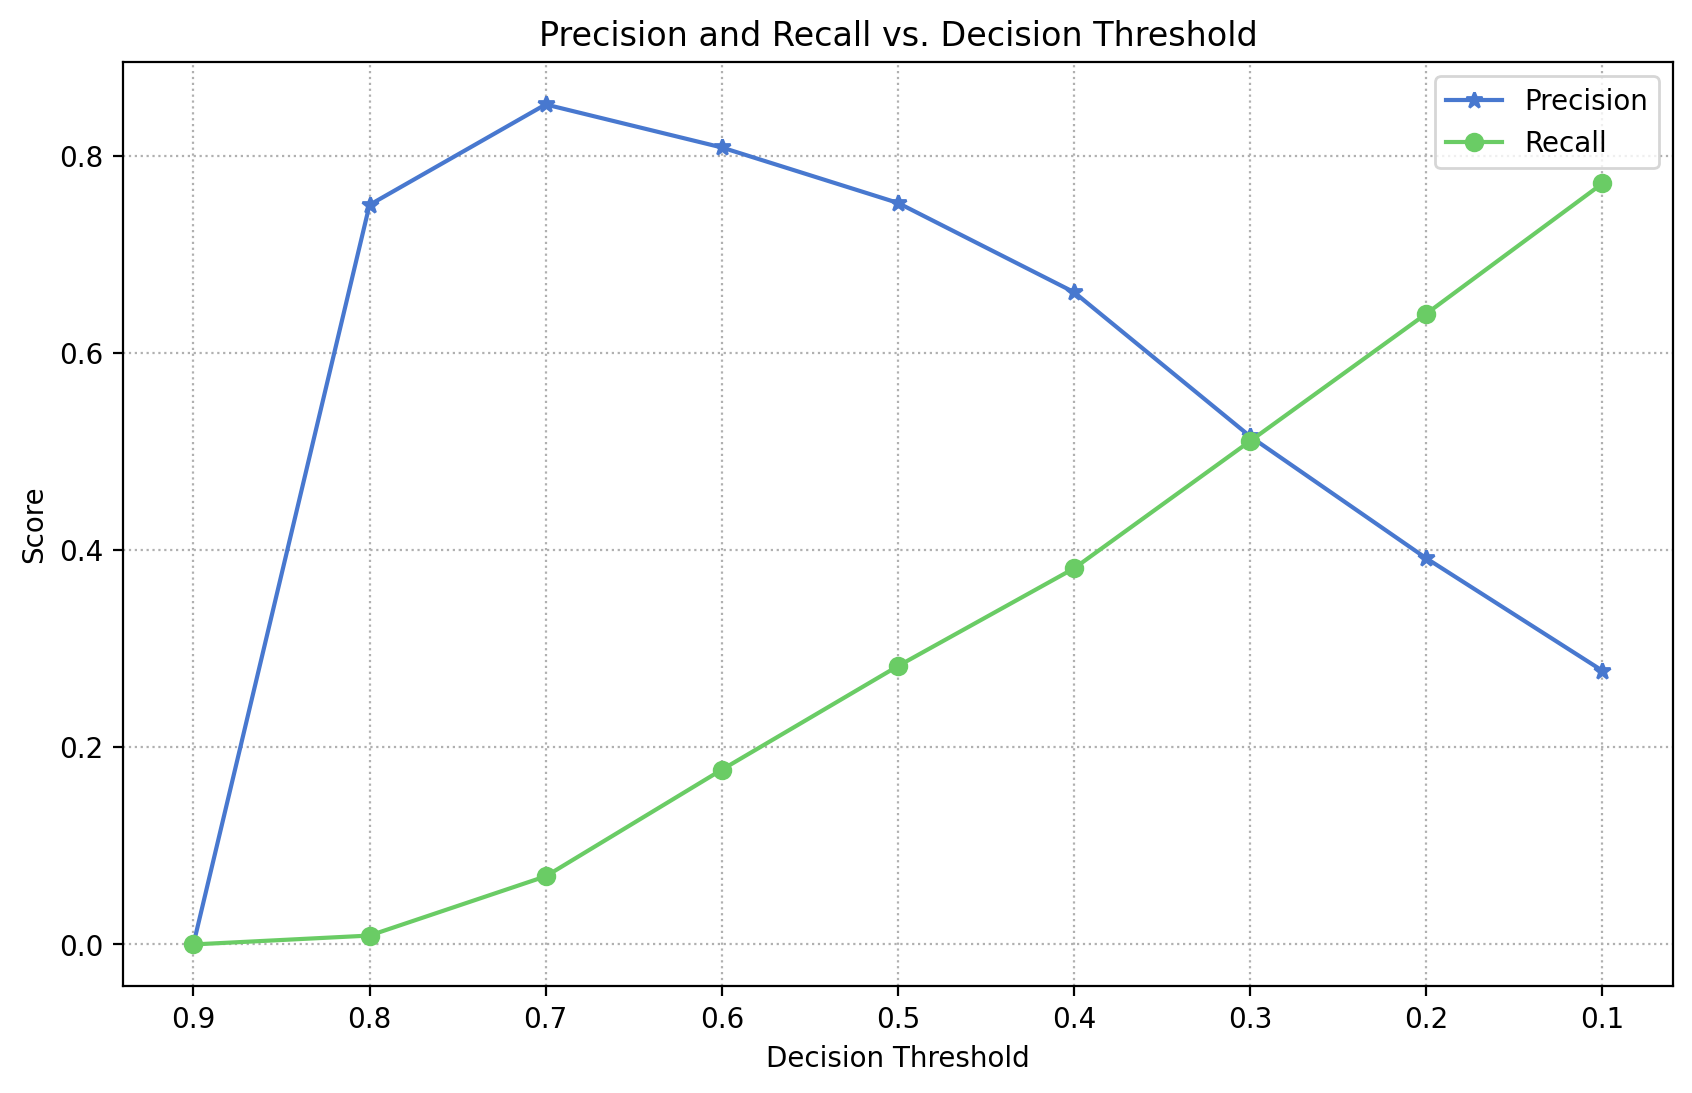

In [59]:
history_df = pd.DataFrame(history, columns=['Decision Threshold', 'Precision', 'Recall'])

plt.figure(figsize=(10, 6))
plt.plot(history_df['Decision Threshold'], history_df['Precision'], label='Precision', marker='*')
plt.plot(history_df['Decision Threshold'], history_df['Recall'], label='Recall', marker='o')

plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Decision Threshold')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()